# Tarea de Estimación

Señal de entrada:
$ x(t) = Cos w_o t - \tfrac{1}{3}Sin3w_o t + \tfrac{1}{5}Cos5w_o t$

Ruido : $n = N(0,\sigma^2)$

$\sigma^2 = [0.01, 0.1, 1, 10]$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scipy.signal import get_window
from sklearn.metrics import mean_squared_error

In [ ]:
def randomvector(N, mu, sigma):

    sigma = 0.1
    return np.random.normal(mu, np.sqrt(sigma), size=N)

def real_signal (t, wo):
    return np.cos(wo*t) - (1/3)*np.sin(3*wo*t) + (1/5)*np.cos(5*wo*t)

def welch_(x, fs, nperseg):
    f, psd = welch(x, fs=fs, nperseg=nperseg)
    return f, psd


N = 1024
M = 2000
mu = 0
fo = 1
wo = 2*np.pi*fo
t = np.linspace(0, 1, N)
fs = 1/(t[1]-t[0])

X = np.zeros((M, N))
for i in range(M):
    X_true = real_signal(t, wo)
    X[i] = X_true + randomvector(N, mu)


#WELCH
nperseg=N
psd_matrix = np.zeros((M, (N//2)+1))



for i in range(M):
    f, psd = welch_(X[i], fs, nperseg)
    psd_matrix[i] = psd


ValueError: noverlap must be less than nperseg.

## Crear la red neuronal

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
psd_matrix = scaler.fit_transform(psd_matrix)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, psd_matrix, test_size=0.3) #random_state=42)

In [ ]:
model = Sequential([
    tf.keras.Input(shape=(N,)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(N//2 + 1)
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.0011 - loss: 0.0892 - val_accuracy: 0.0000e+00 - val_loss: 0.0591
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0076 - loss: 0.0563 - val_accuracy: 0.0000e+00 - val_loss: 0.0425
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0057 - loss: 0.0409 - val_accuracy: 0.0071 - val_loss: 0.0303
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0036 - loss: 0.0303 - val_accuracy: 0.0143 - val_loss: 0.0253
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0034 - loss: 0.0259 - val_accuracy: 0.0107 - val_loss: 0.0233
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0035 - loss: 0.0239 - val_accuracy: 0.0107 - val_loss: 0.0225
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0033 - loss: 0.0232 - val_accuracy: 0.0107 - val_loss: 0.0227
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0172 - loss: 0.0229 - val_accuracy: 0.0143 - 

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0263 - loss: 0.0215 
Test Loss: 0.02156016416847706, Test MAE: 0.03166666626930237
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


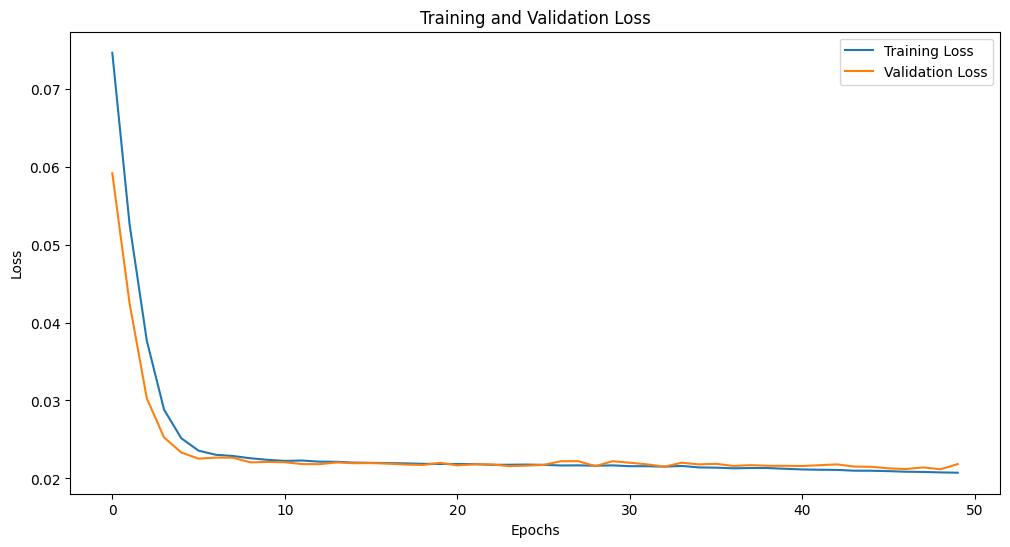

In [ ]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Make predictions
y_pred = model.predict(X_test)

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Mean Square Error: 2.0522946358802894e-05


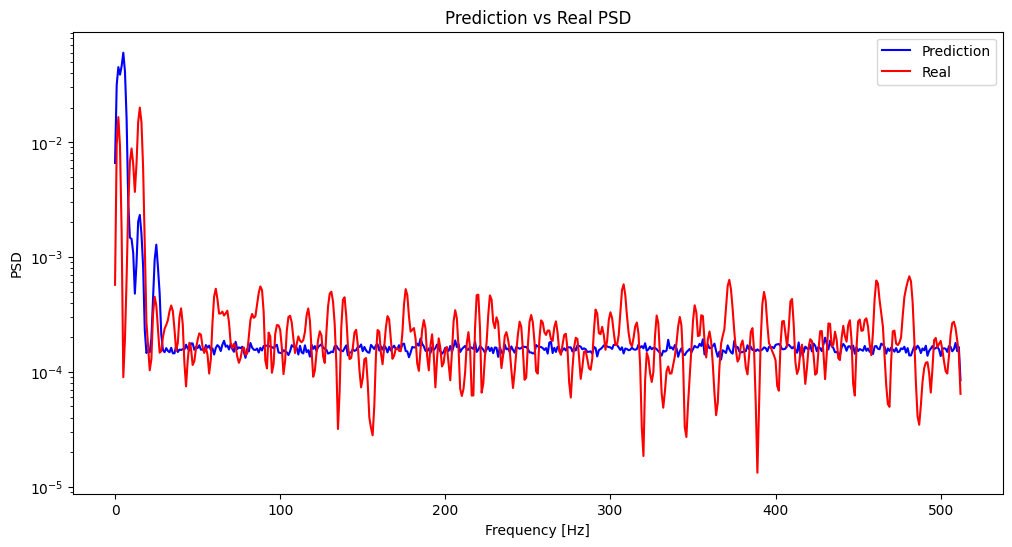

In [ ]:
psd_pred = scaler.inverse_transform(y_pred)
psd_real = scaler.inverse_transform(psd_matrix)

psd_pred_mean = psd_pred[50]
psd_real_mean = psd_real[50]

mean_square_error = np.mean((psd_pred_mean - psd_real_mean)**2)
print("Mean Square Error:", mean_square_error)


plt.figure(figsize=(12, 6))
plt.semilogy(f, psd_pred_mean, color='b', label='Prediction')
plt.semilogy(f, psd_real_mean, color='r', label='Real')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.title('Prediction vs Real PSD')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 513)                 │          66,177 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,265,605 (8.64 MB)

 Trainable params: 755,201 (2.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,510,404 (5.76 MB)

# Señal Reconstruida
- Graficar Señal de welch sin NN, y reconstruirla


- Graficar señal de welch predicha con NN, y reconstruirla

In [ ]:
def randomvector(N, mu, sigma):
    return np.random.normal(mu, np.sqrt(sigma), size=N)

def real_signal (t,wo):
    return np.cos(wo*t) - (1/3)*np.sin(3*wo*t) + (1/5)*np.cos(5*wo*t)

def reconstruct_signal(psd_matrix, fs, nperseg):
    M, half_N = psd_matrix.shape
    N = (half_N - 1) * 2  # Recuperar N original
    reconstructed_signals = np.zeros((M, N))

    for i in range(M):
        # Tomar la raíz cuadrada de la PSD para obtener la magnitud del espectro de Fourier
        amplitude_spectrum = np.sqrt(psd_matrix[i])

        # Reconstruir el espectro completo (incluir parte negativa conjugada)
        full_spectrum = np.zeros(N, dtype=np.complex128)
        full_spectrum[:half_N] = amplitude_spectrum
        full_spectrum[half_N:] = np.conj(amplitude_spectrum[-2:0:-1])

        # Transformada inversa de Fourier
        signal = np.fft.ifft(full_spectrum * np.sqrt(N))  # Normalización inversa
        reconstructed_signals[i] = np.real(signal)

    return reconstructed_signals

N = 1024
M = 2000
fs = 1024
mu = 0
sigma = 0.1
f = 1
wo = 2*np.pi*f

t = np.linspace(0, 1, N)

X = np.zeros((M, N))
for i in range(M):
    X_true = real_signal(t,wo)
    X[i] = X_true + randomvector(N, mu, sigma)

X_true_m = np.zeros((M, N))
for i in range(M):
    X_true_m[i] = real_signal(t,wo)


In [ ]:
#Graficar espectro de potencia no NN
nperseg=N
psd_matrix = np.zeros((M, (N//2)+1))

for i in range(M):
    f, psd = welch(X[i], fs=fs, nperseg=N//2, nfft=1024)
    psd_matrix[i] = psd

In [ ]:
psd_ = model.predict(X)
psd_ = scaler.inverse_transform(psd_)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


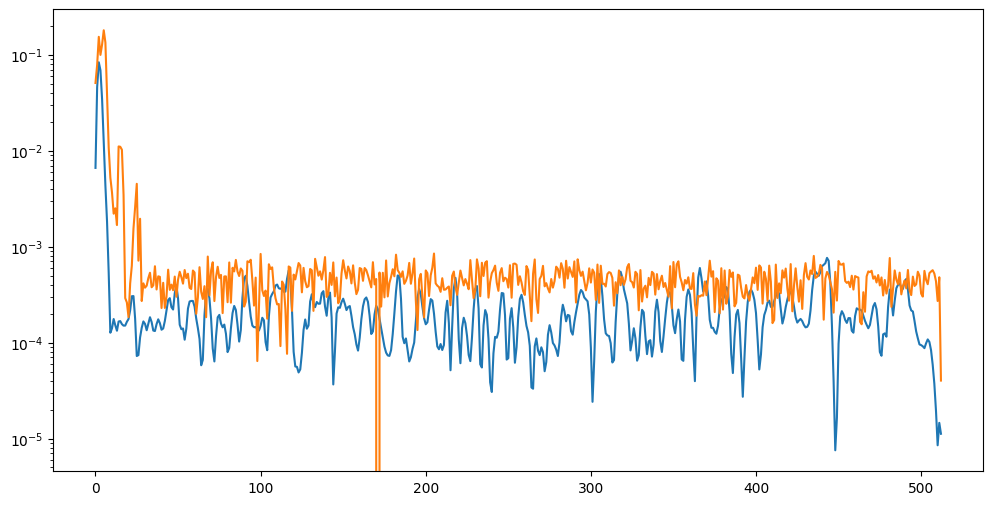

In [ ]:
plt.figure(figsize=(12, 6))
plt.semilogy(f, psd_matrix[50])
plt.semilogy(f, psd_[50])
plt.show()

In [ ]:
rec_sig_real = reconstruct_signal(psd_matrix, fs, nperseg)
rec_sig_pred = reconstruct_signal(psd_, fs, nperseg)

<ipython-input-106-882c7c17dfe1>:14: RuntimeWarning: invalid value encountered in sqrt
  amplitude_spectrum = np.sqrt(psd_matrix[i])


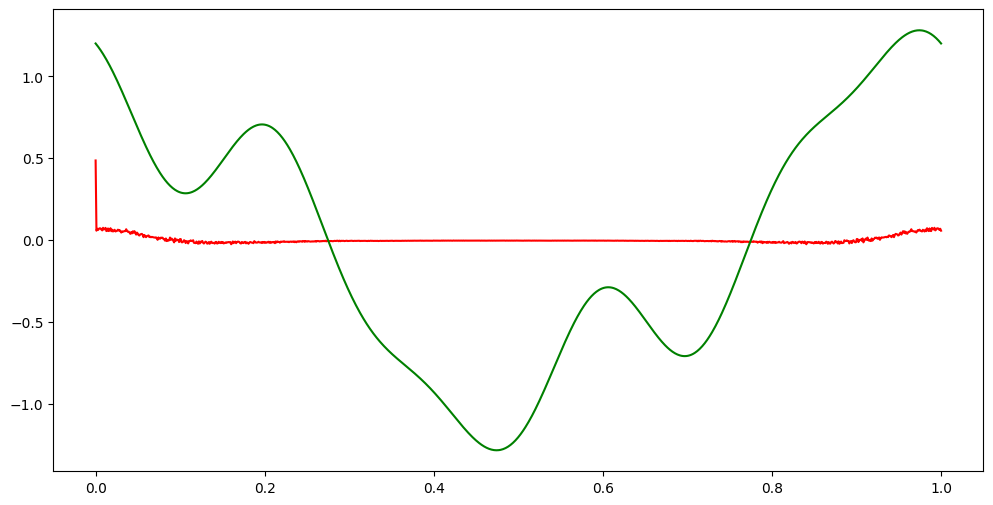

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t,rec_sig_real[501], color='r')
plt.plot(t,rec_sig_pred[501],color='b')
plt.plot(t,X_true_m[501], color='g')
plt.show()

# Cómo hacer welch
- ventana hanning
- overlap 25%
- hacer autocorrelacion de la señal
- nperseg se define según la autocorrelación (primer corte en cero)